### In this example, we wish to find the scatter of the fit. Instead of taking stdev of the residual. 

In [1]:
from __future__ import division
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
from numpy import exp, log, log10


In [3]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(estimate, true, n, sigma):
    '''
    This is already set up for the chi-squared as the statistic to minimize.
    
    It is in likelihood format:
    f = ((1./(2*pi* (sig^2)))^(n/2)) * exp(- ( np.dot(error.T, error)/(2 * (sig^2))))
    f is the likelihood funtion
    loglike = log(f)
    
    In log-likelihood format, this would be:
    
    l(theta) = -(n/2)*log(2*pi*(sig^2)) - (1/(2*(sig^2))) * np.dot(error.T, error)
    where error is the error matrix:
    (Y - X * theta).T (Y-X * theta)
    
    '''
    error = true - estimate   # ydata - yModel, aka residual
    f = (-0.5*n*log(2.0*pi*sigma*sigma)) - (sum(error**2)/(2.0*sigma*sigma))
    return f
    
#     f           = ((1.0/(2.0*pi*sigma*sigma))**(n/2))* \
#                     exp(-1*((np.dot(error.T, error))/(2*sigma*sigma)))
#     return np.log(f)

    
#   define my function which will return the objective function to be minimized
def line(parameters):
    '''
    
    Function to be minimized. This is a linear model. 
    
    '''
    m,b,sigma = parameters # m-slope, b-yintercept, scatter
    yModel    = m * x + b  # estimate of y based on model. 
    f         = calcLogLikelihood(yModel, y, len(yModel), sigma)
    return (-1*f)

In [45]:
data  = pd.read_csv('/Users/KimiZ/GRBs2/Sample/AmatiDataSample.txt', sep=',', header=0)
x     = np.log10(data.eiso/(1.0E52))
y     = np.log10(data.epeakRest)

In [46]:
#   let's maximize the likelihood (minimize -1*max(likelihood)
res = minimize(line, np.array([0.5, 2, 0.3]), method='L-BFGS-B')
res
      

      fun: -14.637374487654867
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.56319402e-05,  -8.52651283e-06,   4.83169060e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 9
   status: 0
  success: True
        x: array([ 0.52089876,  2.05148951,  0.21989445])

In [47]:
res = minimize(line, np.array([1,1,1]), method='L-BFGS-B')
res

      fun: -14.637374487584538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00030695,  0.00020606,  0.00014779])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 15
   status: 0
  success: True
        x: array([ 0.52089852,  2.05148981,  0.21989446])

### The above can be combined into one function. 

In [48]:
def LogLikelihood(parameters):
    '''
    LogLikelihood(parameters)
    
    PARAMETERS:
    ----------
    parameters:  list of floats containing m, b, and sigma. m is slope, b in yintercept, 
                 sigma is the scatter about the fit. In our case, we want this returned. 
                 We leave it as a free variable. 
                 
    NOTES:
    ----------
    Take the log of the likelihood first, and then return that as f. 
    
    '''
    m, b, sigma = parameters
    ymodel      = m * x + b    # linear model
    n           = len(ymodel)
    error       = y - ymodel
    f           = (-0.5*n*log(2.0*pi*sigma*sigma)) - (sum(error**2)/(2.0*sigma*sigma))
    return (-1*f)

In [49]:
res = minimize(LogLikelihood, np.array([0.52,2, 0.3]), method='L-BFGS-B'); res

      fun: -14.637374487654938
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.56319402e-05,   1.27897692e-05,  -7.10542736e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 52
      nit: 9
   status: 0
  success: True
        x: array([ 0.52089876,  2.05148951,  0.21989444])

In [50]:
res = minimize(LogLikelihood, np.array([1,1,1]), method='L-BFGS-B'); res

      fun: -14.637374487584538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00030695,  0.00020606,  0.00014779])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 15
   status: 0
  success: True
        x: array([ 0.52089852,  2.05148981,  0.21989446])

### We really should be passing the x and y data to the function, instead of assuming the function will read the global x and y variables. 

In [51]:
del x, y

In [52]:
def LogLikelihood(parameters, x, y):
    '''
    LogLikelihood(parameters)
    
    PARAMETERS:
    ----------
    parameters:  list of floats containing m, b, and sigma. m is slope, b in yintercept, 
                 sigma is the scatter about the fit. In our case, we want this returned. 
                 We leave it as a free variable. 
                 
    NOTES:
    ----------
    Take the log of the likelihood first, and then return that as f. 
    
    '''
    m, b, sigma        = parameters
    ymodel      = m * x + b    # linear model
    n           = len(ymodel)
    error       = y - ymodel
    f           = (-0.5*n*log(2.0*pi*sigma*sigma)) - (sum(error**2)/(2.0*sigma*sigma))
    return (-1*f)

In [54]:
data  = pd.read_csv('/Users/KimiZ/GRBs2/Sample/AmatiDataSample.txt', sep=',', header=0)
xdata = np.log10(data.eiso/(1.0E52))
ydata = np.log10(data.epeakRest)

In [55]:
res = minimize(LogLikelihood, np.array([0.52,2,0.3]), method='L-BFGS-B', args=(xdata, ydata)); res

      fun: -14.637374487654938
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.56319402e-05,   1.27897692e-05,  -7.10542736e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 52
      nit: 9
   status: 0
  success: True
        x: array([ 0.52089876,  2.05148951,  0.21989444])

In [56]:
res = minimize(LogLikelihood, np.array([1,1,1]), method='L-BFGS-B', args=(xdata, ydata)); res

      fun: -14.637374487584538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00030695,  0.00020606,  0.00014779])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 15
   status: 0
  success: True
        x: array([ 0.52089852,  2.05148981,  0.21989446])

# MCMC 

In [ ]:
import emcee
import corner

data            = pd.read_csv('/Users/KimiZ/GRBs2/Sample/AmatiDataSample.txt', sep=',', header=0)

xdata           = np.log10(data.eiso/(1.0E52))
ydata           = np.log10(data.epeakRest)

The data in this file has errors in the format of margins of error. Margins of error can not be logged. You must first find the confidence intervals (upper and low) and then take the log10 of those. To simplify matters, we will 

In [81]:
data.head()

,name,z,eiso,eiso_err_low,eiso_err_up,epeak,epeak_err_low,epeak_err_up,epeakRest,epeakRest_err_low,epeakRest_err_up
0,970228,0.695,1.649150e+52,1.241290e+51,1.241290e+51,115.044248,37.758112,37.758112,195.0,64.0,64.0
1,970508,0.835,6.321990e+51,1.335630e+51,1.335630e+51,79.019074,23.433243,23.433243,145.0,43.0,43.0
2,970828,0.958,3.037590e+53,3.573640e+52,3.573640e+52,299.284985,59.754852,59.754852,586.0,117.0,117.0
3,971214,3.420,2.205530e+53,2.756910e+52,2.756910e+52,154.977376,30.090498,30.090498,685.0,133.0,133.0
4,980326,1.000,5.008430e+51,9.837990e+50,9.837990e+50,35.500000,18.000000,18.000000,71.0,36.0,36.0


In [158]:
def get_logged_moe(value, moe_lo, moe_up):
    ci_l = value - moe_lo
    ci_u = value + moe_up 
    #moe_l = np.log10(value) - np.log10(ci_l)
    #moe_u = np.log10(ci_u) - np.log10(value)
    return np.log10(value), np.log10(value) - np.log10(ci_l), np.log10(ci_u) - np.log10(value)


In [173]:
value, low, up = get_logged_moe(data.eiso, data.eiso_err_low, data.eiso_err_up)
xdataerr = np.asarray([low, up]) 

value, low, up = get_logged_moe(data.epeakRest, data.epeakRest_err_low, data.epeakRest_err_up)
ydataerr = np.asarray([low, up]) 

In [128]:
# RUN THE MLE TO COMPARE MCMC AGAINST.
result = minimize(LogLikelihood, np.array([1,1,1]), method='L-BFGS-B', args=(xdata, ydata))
print(result)

# SAVE THE PARAMETERS FOUND BY MAXIMUM LIKELIHOOD. WILL USE THESE TO GENERATE DATA BASED
# OFF OF y = mx + b, WHERE m = m_ml AND b = b_ml, WITH SCATTER f_ml
m_ml, b_ml, f_ml  = result["x"]  # or result.x

      fun: -14.637374487584538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00030695,  0.00020606,  0.00014779])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 15
   status: 0
  success: True
        x: array([ 0.52089852,  2.05148981,  0.21989446])


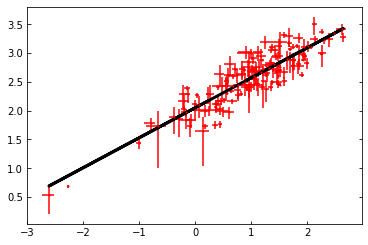

In [183]:
# PLOT THE DATA AND THE LINEAR MODEL
#plt.scatter(xdata, ydata)
plt.plot(xdata, result['x'][0] * xdata + result['x'][1], color='k', lw=3)
plt.errorbar(xdata, ydata, xerr=xdataerr, yerr=ydataerr, fmt='r.', ms=2)
plt.show()

In [184]:
def Prior(parameters):
    '''
    Parameter Prior
    '''
    m, b, f = parameters
    #if 0.4 < m < 0.6 and 1.0 < b < 3.0 and 0.1 < f < 0.3:
    #if 0.1 < m < 1.0 and 0.1 < b < 5.0 and 0.1 < f < 1.0:
    if -1.0 < m < 1.0 and 0 < b < 10.0 and 0 < f < 1.0:
        return 0.0
    return -np.inf

def Prob(parameters, x, y): 
    lp = Prior(parameters)
    if not np.isfinite(lp):
        return -np.inf
    return lp - LogLikelihood(parameters, x, y) # lp + LogLikelihood(parameters, x, y) # our version needs - sign.

## Run MCMC 

In [185]:
ndim, nwalkers = 3, 100
pos = [result.x + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

sampler    = emcee.EnsembleSampler(nwalkers, ndim, Prob, args=(xdata, ydata))
sampler.run_mcmc(pos, 500)
samples    = sampler.chain[:, 50:, :].reshape((-1, ndim))


# WE TAKE THE MAXIMUM LIKELIHOOD RETURNED VALUES TO BE THE TRUE ONES.
m_true, b_true, f_true = result.x

#samples[:, 2] = np.exp(samples[:, 2])  # our f parameter isn't logged.
m_mcmc, b_mcmc, f_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))

m_mcmc, b_mcmc, f_mcmc

print('%.3f %.3f  %.3f'%(m_mcmc[0], m_mcmc[1], m_mcmc[2]))
print('%.3f %.3f  %.3f'%(b_mcmc[0], b_mcmc[1], b_mcmc[2]))
print('%.3f %.3f  %.3f'%(f_mcmc[0], f_mcmc[1], f_mcmc[2]))

print('%.3f %.3f'%(m_mcmc[0], m_ml))
print('%.3f %.3f'%(b_mcmc[0], b_ml))
print('%.2f %.2f'%(f_mcmc[0], f_ml))

m_err = (m_mcmc[1] + m_mcmc[2])/(2.0)
b_err = (b_mcmc[1] + b_mcmc[2])/(2.0)
f_err = (f_mcmc[1] + f_mcmc[2])/(2.0)

print('\n\n')
print('log(Epk) = b + m log(Eiso) \n\n b = %.3f (+- %.3f) \n m = %.3f (+- %.3f) \n f = %.2f (+- %.2f)'%(b_true,b_err,m_true,m_err,f_true,f_err))
print('  f is the extrinsic scatter and sigma in the parameters. ')

0.521 0.023  0.022
2.051 0.028  0.028
0.223 0.013  0.012
0.521 0.521
2.051 2.051
0.22 0.22



log(Epk) = b + m log(Eiso) 

 b = 2.051 (+- 0.028) 
 m = 0.521 (+- 0.022) 
 f = 0.22 (+- 0.01)
  f is the extrinsic scatter and sigma in the parameters. 


# PLOTS

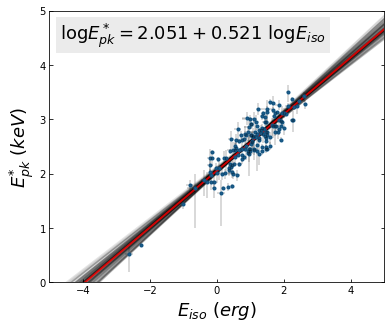

In [186]:
props = dict(boxstyle=None, facecolor='gainsboro', linewidth=0.0, alpha=0.57)


plt.figure(figsize=(6,5))
xl = np.array([-10, 10])
for m, b, f in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m * xl + b, color="k", alpha=0.1)
plt.plot(xl, m_true * xl + b_true, color="r", lw=2, alpha=0.8)
plt.errorbar(xdata, ydata, xerr=xdataerr, yerr=ydataerr, fmt=".k", 
             capsize=0, alpha=0.2)


#plt.plot(x, 0.9 * x + b_true, color='green')
plt.plot(xdata, ydata, ".")
plt.figtext(0.15,0.8,'$%s=%.3f + %.3f %s$'%('\log E^*_{pk}',
                                  b_true, m_true,
                                  ' \ \log E_{iso}'), 
                                    fontsize=18,
                                     bbox=props)                                 
plt.ylim(0,5)
plt.xlim(-5,5)
plt.ylabel('$E^{*}_{pk}$ ($keV$)', fontsize=18)
plt.xlabel('$E_{iso}$ ($erg$)', fontsize=18)
plt.show()

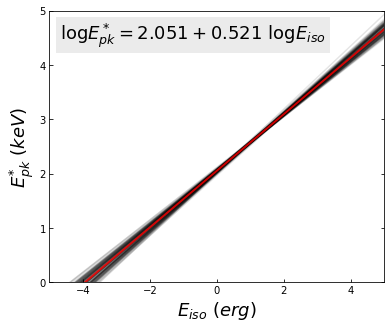

In [188]:
props = dict(boxstyle=None, facecolor='gainsboro', linewidth=0.0, alpha=0.57)


plt.figure(figsize=(6,5))
xl = np.array([-10, 10])
for m, b, f in samples[np.random.randint(len(samples), size=100)]:
    plt.plot(xl, m * xl + b, color="k", alpha=0.1)
plt.plot(xl, m_true * xl + b_true, color="r", lw=2, alpha=0.8)

plt.errorbar(x, y, xerr=xdataerr, yerr=ydataerr, fmt=".k", 
             capsize=0, alpha=0.2)

#plt.plot(x, 0.9 * x + b_true, color='green')
plt.plot(x, y, ".")
plt.figtext(0.15,0.8,'$%s=%.3f + %.3f %s$'%('\log E^*_{pk}',
                                  b_true, m_true,
                                  ' \ \log E_{iso}'), 
                                    fontsize=18,
                                     bbox=props)                                 
plt.ylim(0,5)
plt.xlim(-5,5)
plt.ylabel('$E^{*}_{pk}$ ($keV$)', fontsize=18)
plt.xlabel('$E_{iso}$ ($erg$)', fontsize=18)
plt.show()

## Corner Plot

0.521 0.023  0.022
2.051 0.028  0.028
0.223 0.013  0.012


Text(0.5,0.71,u'$\\log E^*_{pk} \\ =\\ b + m \\ \\log E_{iso}$ \n\n $b \\ =2.051(\\pm0.028)$ \n $m=0.521(\\pm0.022)$ \n $\\sigma_{ext}=0.22 (\\pm0.01)$')

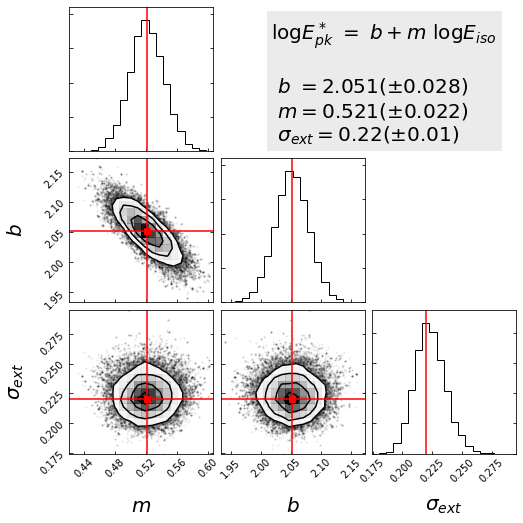

In [187]:
print('%.3f %.3f  %.3f'%(m_mcmc[0], m_mcmc[1], m_mcmc[2]))
print('%.3f %.3f  %.3f'%(b_mcmc[0], b_mcmc[1], b_mcmc[2]))
print('%.3f %.3f  %.3f'%(f_mcmc[0], f_mcmc[1], f_mcmc[2]))

m_err = (m_mcmc[1] + m_mcmc[2])/(2.0)
b_err = (b_mcmc[1] + b_mcmc[2])/(2.0)
f_err = (f_mcmc[1] + f_mcmc[2])/(2.0)



props = dict(boxstyle=None, facecolor='gainsboro', linewidth=0.0, alpha=0.57)
            
label_dict = dict(fontsize=20)
fig = corner.corner(samples, labels=["$m$", "$b$", "$\sigma_{ext}$"], 
                    truth_color='red', 
                    label_kwargs=label_dict,
                    truths=[m_true, b_true, f_true])
                    
plt.figtext(0.5,0.71,'$\log E^*_{pk} \ =\ b + m \ \log E_{iso}$ \n\n $b \ =%.3f(\pm%.3f)$ \n $m=%.3f(\pm%.3f)$ \n $\sigma_{ext}=%.2f (\pm%.2f)$'%(b_true,b_err,m_true,m_err,f_true,f_err),
                                    fontsize = 20,
                                     bbox=props)                                 
                                     
